In [1]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os


In [3]:
print(os.listdir("/gdrive/My Drive/Kidney Cancer"))

['Tumor', 'Normal']


In [4]:
DATADIR = "/gdrive/My Drive/Kidney Cancer"

CATEGORIES = ["Normal","Tumor"]

In [5]:
IMG_SIZE = 100

In [6]:
all_data = []

def create_all_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                all_data.append([new_array, class_num])
            except Exception as e:
                pass

create_all_data()


In [7]:
print("Toplam Görüntü Sayısı: ", len(all_data))

Toplam Görüntü Sayısı:  10000


In [8]:
data = np.array(all_data)

# Giriş ve çıkış verilerini ayırma
X = data[:, 0]  # Giriş verileri (görüntüler)
y = data[:, 1]

<ipython-input-8-606bc6c549e7>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(all_data)


In [9]:
from tensorflow.keras.utils import to_categorical
# Giriş verilerini yeniden boyutlandırma
X = np.array([i.reshape(IMG_SIZE, IMG_SIZE, 1) for i in X])

# Sınıf etiketlerini kategorik hale getirme
y = to_categorical(y, num_classes=2)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)

# Eğitim verisinin %10'unu validation için ayırma
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [13]:
x_train = np.array(X_train)
x_test = np.array(X_temp)

y_train = np.array(y_train)
y_test = np.array(y_temp)

x_val = np.array(X_val)
y_val = np.array(y_val)

In [14]:
print(X_train.shape)
print(X_temp.shape)
print(X_val.shape)

print(y_train.shape)
print(y_temp.shape)
print(y_val.shape)

(5850, 100, 100, 1)
(3500, 100, 100, 1)
(650, 100, 100, 1)
(5850, 2)
(3500, 2)
(650, 2)


In [17]:
from tensorflow import keras
from tensorflow.keras import layers

# Model oluşturma, derleme ve eğitim
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 sınıf için softmax aktivasyonu
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
183/183 [==============================] - 68s 366ms/step - loss: 15.0560 - accuracy: 0.9385 - val_loss: 0.5805 - val_accuracy: 0.9969
Epoch 2/10
183/183 [==============================] - 59s 325ms/step - loss: 1.4562 - accuracy: 0.9860 - val_loss: 0.3521 - val_accuracy: 0.9892
Epoch 3/10
183/183 [==============================] - 58s 317ms/step - loss: 0.1362 - accuracy: 0.9971 - val_loss: 0.0500 - val_accuracy: 0.9985
Epoch 4/10
183/183 [==============================] - 72s 393ms/step - loss: 0.0533 - accuracy: 0.9988 - val_loss: 0.1294 - val_accuracy: 0.9985
Epoch 5/10
183/183 [==============================] - 59s 324ms/step - loss: 0.0253 - accuracy: 0.9991 - val_loss: 0.2411 - val_accuracy: 0.9923
Epoch 6/10
183/183 [==============================] - 66s 363ms/step - loss: 0.2272 - accuracy: 0.9973 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
183/183 [==============================] - 63s 344ms/step - loss: 0.2068 - accuracy: 0.9968 - val_loss: 3.4688e-04

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_temp)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_true, y_pred_classes)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_true, y_pred_classes)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_true, y_pred_classes)
print(f'F1 Score: {f1}')

# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_true, y_pred_classes)
print(f'Classification Report:\n{class_report}')


110/110 [==============================] - 5s 47ms/step
Accuracy: 0.992
Precision: 0.9867205542725174
Recall: 0.9970828471411902
F1 Score: 0.991874637260592
Confusion Matrix:
[[1763   23]
 [   5 1709]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1786
           1       0.99      1.00      0.99      1714

    accuracy                           0.99      3500
   macro avg       0.99      0.99      0.99      3500
weighted avg       0.99      0.99      0.99      3500



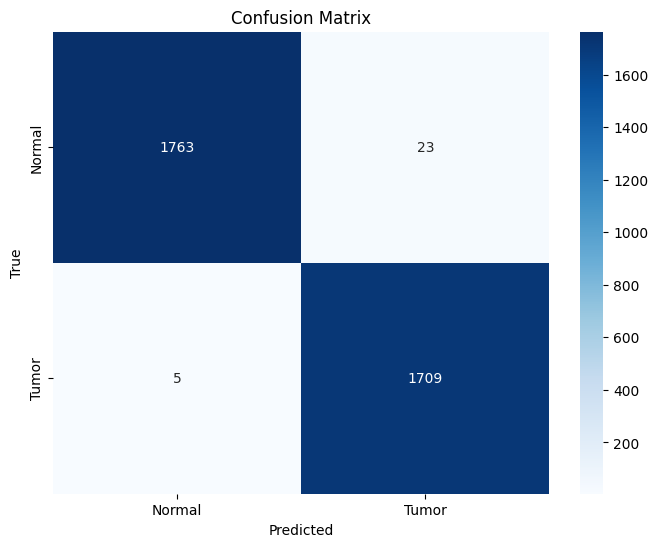

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix'i heatmap olarak görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
